# Prediccion de variables de destino continuas

Esta parte tambien concierne al aprendizaje supervisado, sin embargo, se analizaran variables del tipo continuo para poder encontrar relaciones entre variables y para poder hacer predicciones. Ejemplo: Prediccion de ventas para una empresa.

## Regresion lineal

Se abordara la regresion lineal simple desde la construccion de objetos para su mayor entendimiento y luego, desde la libreria scikit-learn para facilitar los modelos.

Recordar que la regresion linela simple es siempre univariada, por lo tanto estaremos relacionando unicamente dos variables; tambien recordemos que la variable explicativa se llama $x$ y la variable respuesta es la variable $y$; la ecuacion de la regresion lineal simple es:

$$y=w_0+w_1x$$

En donde, en este caso, $w_0$ representa el intercepto con el eje y, y $w_1$ representa la pendiente de la recta, que en otros terminos se define como la variacion en $y$ debida a la variacion unitaria en $x$. El objetivo de este modelo es encontrar los pesos que minimicen los errores de aproximacion, entendidos como la diferencia entre los puntos originales y el modelo mismo:

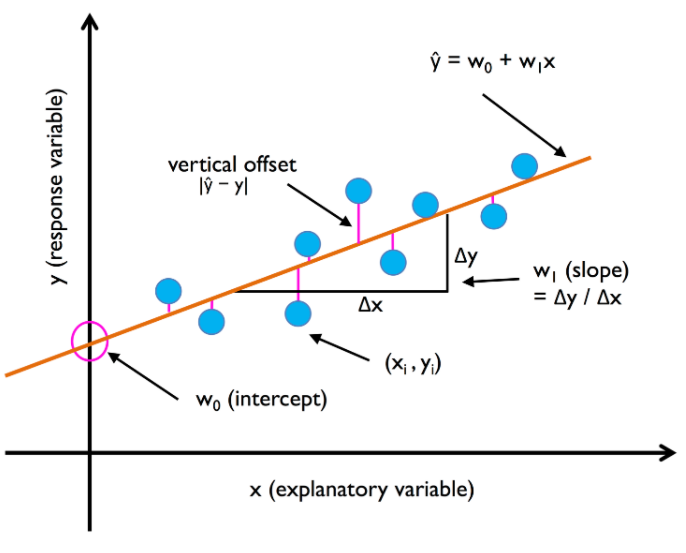

La linea de mejor ajuste se llamara _la recta de regresion_ , y las lineas verticales que van desde la recta a los puntos se conocen como _**offset**_ o **residuos**. (errores de la prediccion)

## Regresion lineal multiple

Cuando generalizamos el modelo de la regresion lineal simple a mas de una variable explicativa, generamos un modelo llamado **regresion lineal multiple**:

$$ y = w_0+w_1x_1+w_2x_2+\dots+w_mx_m=\sum_{i=0}^m w_ix_i=w^Tx$$

En este caso, $w_0$ es el eje $y$ que intercepta con $x_0=1$.

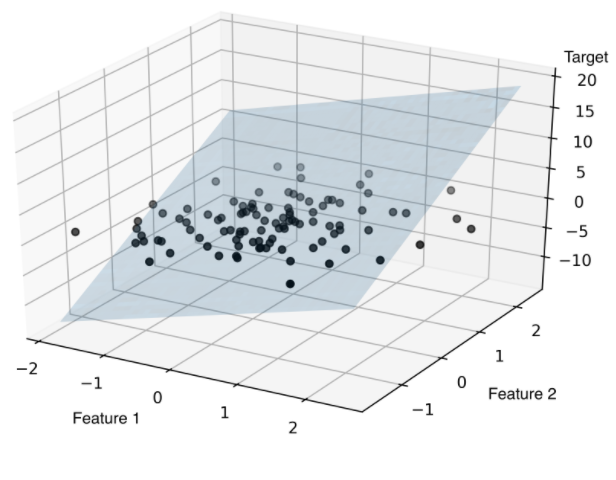

## Conjunto de datos _Housing_

Descripcion obtenida de: https://archive.ics.uci.edu/ml/datasets/Housing

Atributos:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s   
    
La variables explicativa sera la variable MEDV.

In [1]:
import pandas as pd

df = pd.read_csv('housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Analisis exploratorio de datos (EDA)

Se refiere al analisis exploratorio que hemos realizado en secciones anteriores, pero lo incluyo para que podamos explorar esta base de datos, observar outliers y verificar posibles relaciones lineales.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.pairplot(df, height=1.5)
plt.tight_layout()

In [3]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=1.5)
plt.tight_layout()

Error in callback <function flush_figures at 0x0000021572859430> (for post_execute):


KeyboardInterrupt: 

Es importante tener en cuenta que la condicion de normalidad sobre cada una de las variables es un requisito que se puede pasar por alto, y el cual es usado para pruebas especificas sobre el modelado.

## Cuantificar las relaciones con la matriz de correlacion

La matriz de correlacion es una matriz con un significado similar a la matriz de covarianza vista en el metodo PCA. Su diferencia es que la matriz de correlacion proviene de variables estandarizadas.

LA matriz de correlacion se construye a partir de un coeficiente llamado **coeficiente de correlacion de  Pearson**, o **coeficiente de Pearson**, el cual mide la dependencia lineal entre dos variables; cabe recordar que puede tomar valores de -1 a 1, siendo 1 una dependencia directamente proporcional entre las variables, -1 una dependencia directamente proporcional negativa entre las variables, y 0 ausencia de relacion linela; los valores intermedios representaran mayor o menor grado de relacion.

El coeficiente de correlacion se calcula como:

$$r = \dfrac{\displaystyle \sum_{i=1}^n (x^{(i)} - \mu_x)\cdot(y^{(i)} - \mu_y)}{\sqrt{\displaystyle \sum_{i=1}^n (x^{(i)} - \mu_x)^2}\cdot\sqrt{\displaystyle \sum_{i=1}^n (y^{(i)} - \mu_y)^2}} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$$

$\sigma_{xy}$ es la covarianza entre las caracteristicas, $\sigma_x$ y $\sigma_y$ representan sus desviaciones estandar.

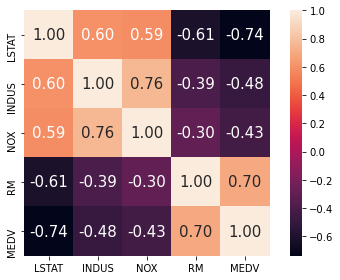

In [4]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                 yticklabels=cols, xticklabels=cols)

plt.tight_layout()

## Modelo de regresion lineal a partir de objetos

Como se menciono al principio, es necesario estimar los pesos $w_i$ qie minimicen el error, o los residuos, que no son mas que las distancias o diferencia entre los puntos y el modelo mismo; como se comento en clases pasadas (estadistica), un modelo muy popular para lograr nuestro objetivo es el conocido modelo de _minimo cuadrados ordinarios_.

En esta ocasion, combinaremos lo que ya sabemos de dicho modelo con la teoria del descenso del gradiente; resulta que la funcion de coste utilizada en el modelo _Adaline_, la primera vez que hablamos del descenso del gradiente, es identica a la funcion OLS mencionada:

$$J(w)=\frac{1}{2}\sum_{i=1}^n \big ( y^{(i)}-\hat{y}^{(i)} \big )^2$$

En donde $\hat{y} = w^Tx$ es la prediccion. El 1/2 es nuevo, y se agrega para facilitar la derivacion de la funcion de coste.

Entonces, el modelo OLS sera igual al mismo modelo _Adaline_ pero sin la funcion escalon unitario, por lo que se obtendran valores de destino continuos en lugar de las etiquetas 1 y -1:

In [5]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [6]:
X = df[['RM']].values
y = df['MEDV'].values

In [7]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [8]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

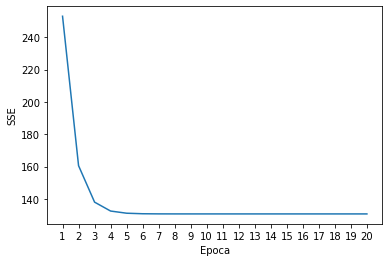

In [9]:
# Analisis de la convergencia del algoritmo

fig, ax = plt.subplots()
ax.plot(range(1, lr.n_iter+1), lr.cost_)
ax.set_ylabel('SSE')
ax.set_xlabel('Epoca')
ax.set_xticks(range(1, lr.n_iter+1));

In [10]:
# Funcion de ayuda para ajustar la linea de regresion
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return None

Text(0, 0.5, 'Precio en $1000s [MEDV] (standardized)')

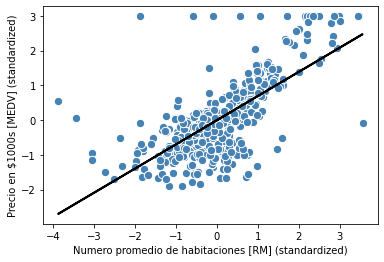

In [11]:
# Ajustando la linea de regresion
lin_regplot(X_std, y_std, lr)
plt.xlabel('Numero promedio de habitaciones [RM] (standardized)')
plt.ylabel('Precio en $1000s [MEDV] (standardized)')

In [12]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [13]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print(f'Precio en in $1000s: {np.round(sc_y.inverse_transform(price_std)[0], 3)}')

Precio en in $1000s: 10.84


Como se vio anteriormente, el intercepto nos dio un valor de cero, lo cual pareciera sorprendente, pero en realidad no lo es, ya que debido a la estandarizacion, esto pasara siempre.

<div class="burk">
EJERCICIOS</div><i class="fa fa-lightbulb-o "></i>

Con el animo de practicar un poco el funcionamiento del objeto creado, realice dos regresiones lineales con dos variables mas, una que se observe con correlacion alta, y otra que se observe con correlacion baja. Analice graficamente la convergencia del algoritmo. Estime las dos regresiones y grafiquelas. No olvide calcular los interceptos y las pendientes. Estos valores los usaremos para el siguiente ejerrcicio de comparacion.

In [55]:
X = df[['NOX']].values
y = df['MEDV'].values

In [56]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [57]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

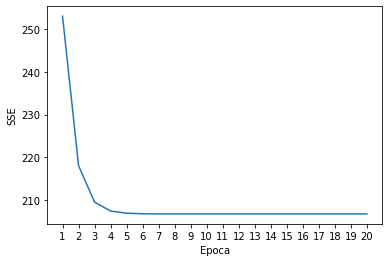

In [58]:
# Analisis de la convergencia del algoritmo

fig, ax = plt.subplots()
ax.plot(range(1, lr.n_iter+1), lr.cost_)
ax.set_ylabel('SSE')
ax.set_xlabel('Epoca')
ax.set_xticks(range(1, lr.n_iter+1));

In [59]:
# Funcion de ayuda para ajustar la linea de regresion
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return None

Text(0, 0.5, 'Precio en $1000s [MEDV] (standardized)')

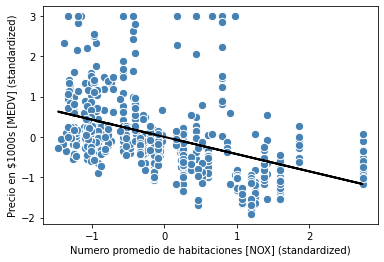

In [60]:
# Ajustando la linea de regresion
lin_regplot(X_std, y_std, lr)
plt.xlabel('Numero promedio de habitaciones [NOX] (standardized)')
plt.ylabel('Precio en $1000s [MEDV] (standardized)')

In [61]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: -0.427
Intercept: -0.000


In [62]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print(f'Precio en in $1000s: {np.round(sc_y.inverse_transform(price_std)[0], 3)}')

Precio en in $1000s: -128.234


CORRELACION BAJA

In [22]:
X1 = df[['LSTAT']].values
y1 = df['MEDV'].values

In [23]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X1)
y_std = sc_y.fit_transform(y1[:, np.newaxis]).flatten()

In [24]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

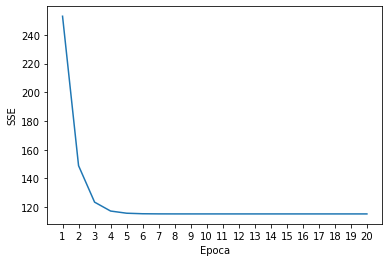

In [25]:
# Analisis de la convergencia del algoritmo

fig, ax = plt.subplots()
ax.plot(range(1, lr.n_iter+1), lr.cost_)
ax.set_ylabel('SSE')
ax.set_xlabel('Epoca')
ax.set_xticks(range(1, lr.n_iter+1));

In [27]:
# Funcion de ayuda para ajustar la linea de regresion
def lin_regplot(X1, y1, model):
    plt.scatter(X1, y1, c='steelblue', edgecolor='white', s=70)
    plt.plot(X1, model.predict(X1), color='black', lw=2)    
    return None

Text(0, 0.5, 'Precio en $1000s [MEDV] (standardized)')

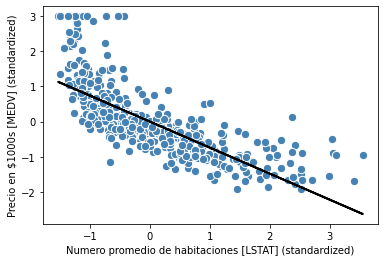

In [31]:
# Ajustando la linea de regresion
lin_regplot(X_std, y_std, lr)
plt.xlabel('Numero promedio de habitaciones [LSTAT] (standardized)')
plt.ylabel('Precio en $1000s [MEDV] (standardized)')

In [29]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: -0.738
Intercept: -0.000


In [30]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print(f'Precio en in $1000s: {np.round(sc_y.inverse_transform(price_std)[0], 3)}')

Precio en in $1000s: 29.804


## Usando scikit-learn para estimar la regresion lineal

Como siempre, las librerias incluidas en scikit-learn hacen el trabajo por nosotros mas rapido y mas facil de implementar. Lo diferente en esta ocasion es que este funciona mejor con variables sin estandarizar; muchos de los algoritmos de regresion funcionan mejor de esta manera, sin embargo hay excepciones que veremos mas adelante. 

In [63]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -33.916
Intercept: 41.346


Text(0, 0.5, 'Precio en $1000s [MEDV] (standardized)')

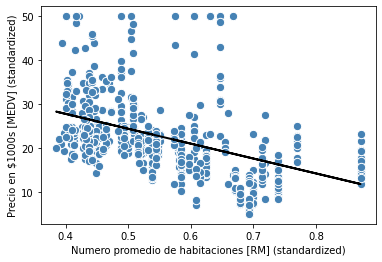

In [64]:
lin_regplot(X, y, slr)
plt.xlabel('Numero promedio de habitaciones [RM] (standardized)')
plt.ylabel('Precio en $1000s [MEDV] (standardized)')

<div class="burk">
EJERCICIOS</div><i class="fa fa-lightbulb-o "></i>

Cree una regresion lineal de los datos usados en el ejercicio anterior pero usando esta vez scikit-learn. Grafiqeu y saque los coeficentes. Comparelos y saque sus conclusiones.

In [65]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -33.916
Intercept: 41.346


Text(0, 0.5, 'Precio en $1000s [INDUS] (standardized)')

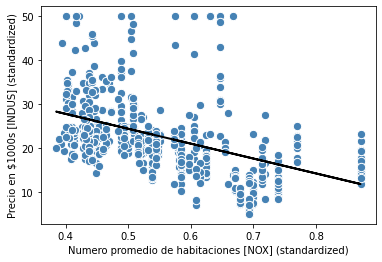

In [66]:
lin_regplot(X, y, slr)
plt.xlabel('Numero promedio de habitaciones [NOX] (standardized)')
plt.ylabel('Precio en $1000s [INDUS] (standardized)')

In [67]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X1, y1)
y_pred = slr.predict(X1)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -0.950
Intercept: 34.554


Text(0, 0.5, 'Precio en $1000s [MEDV] (standardized)')

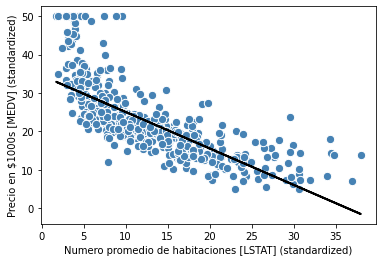

In [68]:
lin_regplot(X1, y1, slr)
plt.xlabel('Numero promedio de habitaciones [LSTAT] (standardized)')
plt.ylabel('Precio en $1000s [MEDV] (standardized)')

## Ajustar un modelo robusto de regresion con RANSAC

Una de las problematicas con los modelos de regresion lineal son los *outliers*, los cuales pueden afectar considerablemente el valor de los coeficientes. Existen diversas formas de tratar con los *outliers*, entre ellas ajustar el modelo a un subconjunto de los datos, los denominados ***inliers***. El modelo que nos permite esto se conoce como **RANdom SAmple Consensus**.

Sus pasos son los siguientes:
1. Selecciona un numero aleatorio de muestras para ser *inliers* y ajustar el modelo.
2. Prueba todos los otros puntos frente al modelo ajustado y agrega aquellos puntos que caen dentro de una tolerancia proporcionada por el usuario de los *inliers*.
3. Vuelve a ajustar el modelo usando todos los *inliers*.
4. Estima el error del modelo ajustado frente a los *inliers*.
5. Finaliza el algoritmo si el rendimiento encuentra un determinado umbral definido por el usuario o si se ha llegado a un numero fijo de iteraciones; si no, vuelve al paso 1.

Para saber mas del parametro `residual_threshold` puede recurrir a: *Automatic Estimation of the Inlier Threshold in Robust Multiple Structures Fitting, R. Toldo, A. Fusiello's, Springer, 2009*. Paginas 123-131

<div class="burk">
EJERCICIOS</div><i class="fa fa-lightbulb-o "></i>

Cree modelos RANSAC de las caracteristicas usadas en ejercicios anteriores. Grafique los dos modelos y calcule sus pendientes e interceptos. Es posible que le den muy diferentes. Verifique esta afirmacion.

In [76]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', 
                         residual_threshold=5.0)

ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                residual_threshold=5.0)

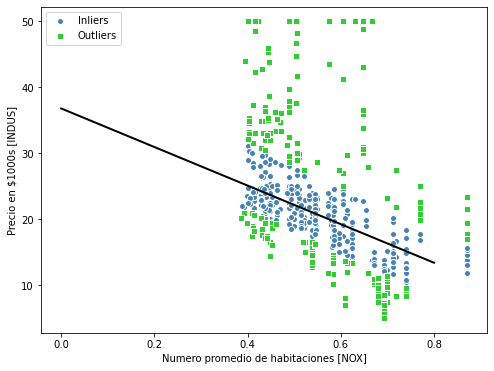

In [77]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(0, 1, 0.2)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
ax.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')
ax.plot(line_X, line_y_ransac, color='black', lw=2)   
ax.set_xlabel('Numero promedio de habitaciones [NOX]')
ax.set_ylabel('Precio en $1000s [INDUS]')
ax.legend(loc='upper left')

In [81]:
print('Pendiente: %.3f' % ransac.estimator_.coef_[0])
print('Intercepto: %.3f' % ransac.estimator_.intercept_)

Pendiente: -0.762
Intercepto: 30.296


In [82]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', 
                         residual_threshold=5.0)

ransac.fit(X1, y1)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                residual_threshold=5.0)

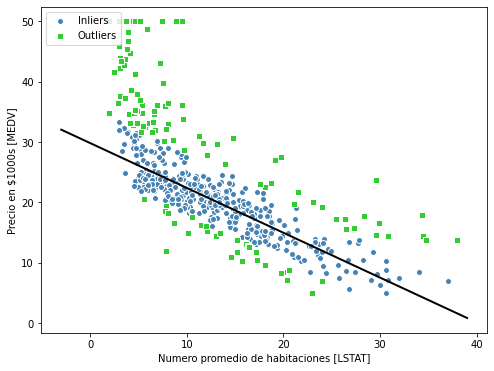

In [84]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(-3, 40, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

fig, ax = plt.subplots(figsize = (8, 6))

ax.scatter(X1[inlier_mask], y1[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
ax.scatter(X1[outlier_mask], y1[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')
ax.plot(line_X, line_y_ransac, color='black', lw=2)   
ax.set_xlabel('Numero promedio de habitaciones [LSTAT]')
ax.set_ylabel('Precio en $1000s [MEDV]')
ax.legend(loc='upper left')

## Midiendo el rendimiento

En esta parte volveremos a nuestra costumbre de dividir los datos en entrenamiento y prueba; ademas tomaremos un modelo mas complejo pues analizaremos todas las variables del conjunto de datos, logrando un algoritmo de regresion lineal multiple.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [ ]:
# Creando un grafico de residuos
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Entrenamiento')
ax.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Prueba')
ax.set_xlabel('VLores predichos')
ax.set_ylabel('Residuos')
ax.legend(loc='upper left')
ax.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
ax.set_xlim([-10, 50]);

Otra alternativa para medir el rendimiento es el ***MSE*** (***Error cuadratico Medio***). El *MSE* es util para comparar diferentes modelos de regresion o para modificar parametros mediante la busqueda de cuadriculas y validacion cruzada:

$$MSE= \frac{1}{n} \sum_{i=1}^n \big ( y^{(i)}-\hat{y}^{(i)} \big )^2$$

In [ ]:
# Si el MSE del entrenamiento es menor que el MSE de la prueba, tendremos sobreajuste
from sklearn.metrics import mean_squared_error

print(f'MSE entrenamiento: {mean_squared_error(y_train, y_train_pred)}, Test: {mean_squared_error(y_test, y_test_pred)}')

Otra alternativa a la medicion del rendimiento es el ***coeficiente de determinacion $R^2$***, el cual es una version mas intuitiva para el rendimiento y representa la version estandarizada del *MSE*. 

$$R^2=1-\frac{SSE}{SST}$$

En donde

$$SST= \sum_{i=1}^n \big (y^{(i)}-\mu_y \big )^2$$

$$ SSE = \sum_{i=1}^n \big ( y^{(i)}-\hat{y}^{(i)} \big )^2$$

SST es la misma varianza de la respuesta. 

El $R^2$ se encuentra entre los valores 0 y 1 para el conjunto de entrenamiento, pero para el conjunto de prueba puede ser negativo. Si $R^2=1$, el modelo ajusta perfectamente los datos, ya que *MSE=0*.

In [ ]:
from sklearn.metrics import r2_score

print(f'R^2 entrenamiento: {r2_score(y_train, y_train_pred)}, test: {r2_score(y_test, y_test_pred)}')

## Regularizando la regresion

EJERCICIOS
Mida el rendimiento de sus anteriores ejercicios. Utilice los dos metodos vistos para esto. En total deberia estimar 6 rendimientos diferentes, dos por cada ejercicio.

Mineria de datos: Consiga una base de datos para regresion que usted crea que puede relacionarse linealmente. Apliquele una regresion lineal y evalue el rendimiento. Luego apliquele el modelo RANSAC y estime cuales valores podrian ser outliers para fijar el parametro residual_threshold.

In [85]:
from sklearn.model_selection import train_test_split

X = df[['RM']].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [86]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

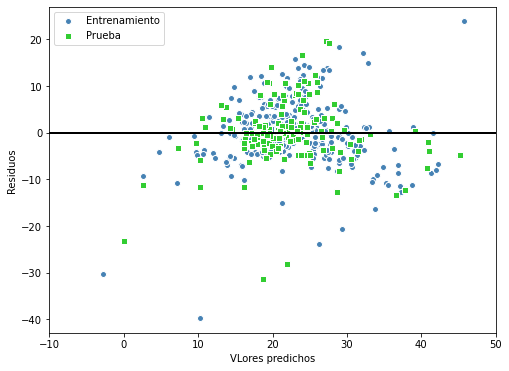

In [87]:
# Creando un grafico de residuos
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Entrenamiento')
ax.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Prueba')
ax.set_xlabel('VLores predichos')
ax.set_ylabel('Residuos')
ax.legend(loc='upper left')
ax.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
ax.set_xlim([-10, 50]);

In [88]:
# Si el MSE del entrenamiento es menor que el MSE de la prueba, tendremos sobreajuste
from sklearn.metrics import mean_squared_error

print(f'MSE entrenamiento: {mean_squared_error(y_train, y_train_pred)}, Test: {mean_squared_error(y_test, y_test_pred)}')

MSE entrenamiento: 42.15765086312224, Test: 47.03304747975518


In [89]:
from sklearn.metrics import r2_score

print(f'R^2 entrenamiento: {r2_score(y_train, y_train_pred)}, test: {r2_score(y_test, y_test_pred)}')

R^2 entrenamiento: 0.5026497630040827, test: 0.43514364832115193


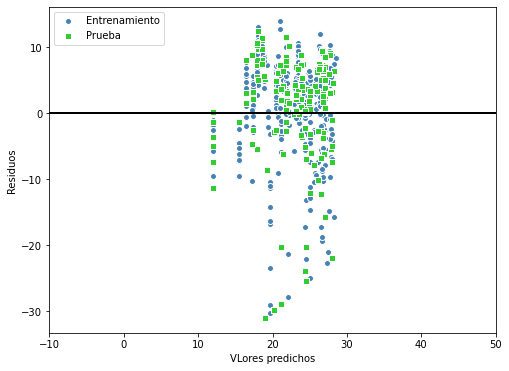

In [90]:
from sklearn.model_selection import train_test_split

X = df[['NOX']].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
# Creando un grafico de residuos
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Entrenamiento')
ax.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Prueba')
ax.set_xlabel('VLores predichos')
ax.set_ylabel('Residuos')
ax.legend(loc='upper left')
ax.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
ax.set_xlim([-10, 50]);

In [91]:
# Si el MSE del entrenamiento es menor que el MSE de la prueba, tendremos sobreajuste
from sklearn.metrics import mean_squared_error

print(f'MSE entrenamiento: {mean_squared_error(y_train, y_train_pred)}, Test: {mean_squared_error(y_test, y_test_pred)}')
from sklearn.metrics import r2_score

print(f'R^2 entrenamiento: {r2_score(y_train, y_train_pred)}, test: {r2_score(y_test, y_test_pred)}')


MSE entrenamiento: 69.3318963951342, Test: 68.46767297659689
R^2 entrenamiento: 0.18206459806184316, test: 0.17771860345328638


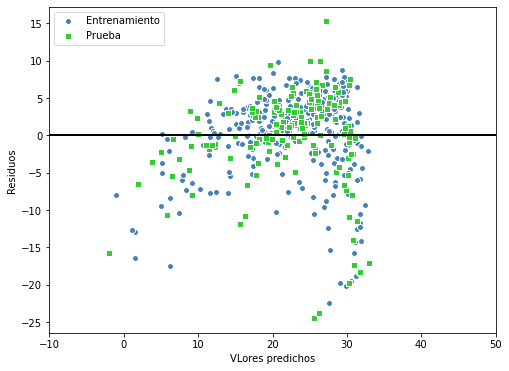

In [92]:
from sklearn.model_selection import train_test_split

X = df[['LSTAT']].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
# Creando un grafico de residuos
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Entrenamiento')
ax.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Prueba')
ax.set_xlabel('VLores predichos')
ax.set_ylabel('Residuos')
ax.legend(loc='upper left')
ax.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
ax.set_xlim([-10, 50]);

In [93]:
# Si el MSE del entrenamiento es menor que el MSE de la prueba, tendremos sobreajuste
from sklearn.metrics import mean_squared_error

print(f'MSE entrenamiento: {mean_squared_error(y_train, y_train_pred)}, Test: {mean_squared_error(y_test, y_test_pred)}')
from sklearn.metrics import r2_score

print(f'R^2 entrenamiento: {r2_score(y_train, y_train_pred)}, test: {r2_score(y_test, y_test_pred)}')


MSE entrenamiento: 37.933978172880295, Test: 39.81715050474416
R^2 entrenamiento: 0.5524780757890007, test: 0.5218049526125568


Mineria de datos: Consiga una base de datos para regresion que usted crea que puede relacionarse linealmente. Apliquele una regresion lineal y evalue el rendimiento. Luego apliquele el modelo RANSAC y estime cuales valores podrian ser outliers para fijar el parametro residual_threshold.

In [108]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')


In [109]:
size_mapping1 = {'Male': 0, 'Female':1}
df['Gender'] = df['Gender'].map(size_mapping1)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19.0,19000.0,0
1,15810944,0,35.0,20000.0,0
2,15668575,1,26.0,43000.0,0
3,15603246,1,27.0,57000.0,0
4,15804002,0,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,1,46.0,41000.0,1
396,15706071,0,51.0,23000.0,1
397,15654296,1,50.0,20000.0,1
398,15755018,0,36.0,33000.0,0


In [112]:

X = df.iloc[:, 2:4].values
y = df.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [134]:

X = df[['EstimatedSalary']].values
y = df['Purchased'].values

In [135]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

In [137]:
# Funcion de ayuda para ajustar la linea de regresion
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return None

In [139]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.362
Intercept: 0.000


In [142]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.000
Intercept: 0.002


Text(0, 0.5, 'COMPRA en 1000s [Purchased] (standardized)')

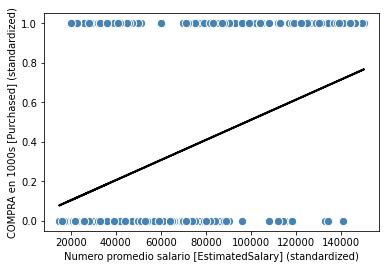

In [144]:
lin_regplot(X, y, slr)
plt.xlabel('Numero promedio salario [EstimatedSalary] (standardized)')
plt.ylabel('COMPRA en 1000s [Purchased] (standardized)')

In [145]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 2:4].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [146]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

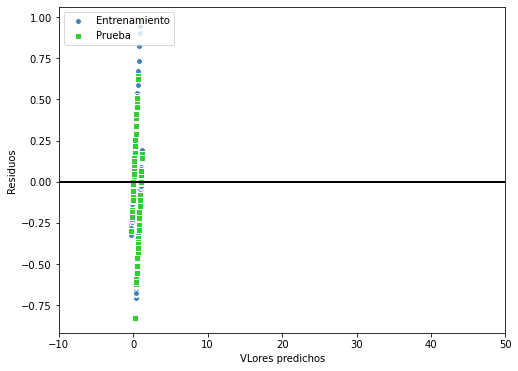

In [147]:
# Creando un grafico de residuos
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Entrenamiento')
ax.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Prueba')
ax.set_xlabel('VLores predichos')
ax.set_ylabel('Residuos')
ax.legend(loc='upper left')
ax.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
ax.set_xlim([-10, 50]);

In [148]:
# Si el MSE del entrenamiento es menor que el MSE de la prueba, tendremos sobreajuste
from sklearn.metrics import mean_squared_error

print(f'MSE entrenamiento: {mean_squared_error(y_train, y_train_pred)}, Test: {mean_squared_error(y_test, y_test_pred)}')

MSE entrenamiento: 0.1306653064493789, Test: 0.10892532150340756


In [149]:
from sklearn.metrics import r2_score

print(f'R^2 entrenamiento: {r2_score(y_train, y_train_pred)}, test: {r2_score(y_test, y_test_pred)}')

R^2 entrenamiento: 0.435769991978888, test: 0.5157379964034983
